In [18]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%cd /content/drive/MyDrive/DA004/LC_dataset/

/content/drive/MyDrive/DA004/LC_dataset


In [20]:
train_dataset = 'train'
validation_dataset = 'valid'
test_dataset = 'test'

In [21]:
# Tham số tiền xử lý
img_width, img_height = 224, 224
batch_size = 32

In [22]:

# Tăng cường dữ liệu cho dữ liệu đào tạo
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Chuẩn hóa giá trị pixel
    shear_range=0.2,           # Biến dạng cắt
    zoom_range=0.2,            # Phóng to thu nhỏ
    horizontal_flip=True,      # Lật ngang
    rotation_range=20,         # Xoay ảnh
    width_shift_range=0.2,     # Dịch chuyển ngang
    height_shift_range=0.2     # Dịch chuyển dọc
)

# Không tăng cường dữ liệu cho dữ liệu xác thực, chỉ chuẩn hóa
validation_datagen = ImageDataGenerator(rescale=1./255)

# Tạo các bộ dữ liệu từ thư mục
train_dataset = train_datagen.flow_from_directory(
    directory='train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'        # Phân loại nhị phân
)

validation_dataset = validation_datagen.flow_from_directory(
    'valid',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1406 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [23]:
train_dataset.class_indices

{'Bacterial Pneumonia': 0, 'Normal': 1}

In [24]:
validation_dataset.class_indices

{'Bacterial Pneumonia': 0, 'Normal': 1}

In [25]:
# Xây dựng mô hình mạng nơ-ron tích chập (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Lớp tích chập đầu tiên
    tf.keras.layers.MaxPooling2D(2, 2),                                               # Lớp gộp

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                             # Lớp tích chập thứ hai
    tf.keras.layers.MaxPooling2D(2,2),                                                # Lớp gộp

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),                            # Lớp tích chập thứ ba
    tf.keras.layers.MaxPooling2D(2,2),                                                # Lớp gộp

    tf.keras.layers.Flatten(),                                                        # Làm phẳng đầu ra từ các lớp trước
    tf.keras.layers.Dense(512, activation='relu'),                                    # Lớp Dense
    tf.keras.layers.Dense(1, activation='sigmoid')                                    # Lớp đầu ra với hàm kích hoạt sigmoid
])

In [34]:
# Biên dịch mô hình
model.compile(
    loss='binary_crossentropy',     # Hàm mất mát
    optimizer='adam',               # Thuật toán tối ưu
    metrics=['accuracy']            # Đánh giá độ chính xác
)

# Định nghĩa các callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Dừng sớm nếu không cải thiện
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)     # Giảm tốc độ học nếu không cải thiện

# Huấn luyện mô hình
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=20,
    validation_data=validation_dataset
)

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# # Train mô hình
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=20,  # Tăng số epoch để xem Early Stopping có hiệu quả không
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     callbacks=[early_stopping, reduce_lr]
# )


Epoch 1/20
44/44 [==============================] - 210s 5s/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.5095 - val_accuracy: 0.8571
Epoch 2/20
44/44 [==============================] - 207s 5s/step - loss: 0.0054 - accuracy: 0.9979 - val_loss: 7.5070e-07 - val_accuracy: 1.0000
Epoch 3/20
44/44 [==============================] - 204s 5s/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/20
44/44 [==============================] - 205s 5s/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 5.1390e-05 - val_accuracy: 1.0000
Epoch 5/20
44/44 [==============================] - 205s 5s/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 6.9084e-06 - val_accuracy: 1.0000
Epoch 6/20
44/44 [==============================] - 207s 5s/step - loss: 3.0576e-04 - accuracy: 1.0000 - val_loss: 3.5361e-06 - val_accuracy: 1.0000
Epoch 7/20
44/44 [==============================] - 211s 5s/step - loss: 2.2071e-05 - accuracy: 1.0000 - val_loss: 3.9592e-06 - val_ac

In [35]:
# Dự đoán trên tập dữ liệu kiểm tra 'Normal'
dir_path = 'test/Normal'
for i in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, i))       # Đọc hình ảnh
    img = cv2.resize(img, (224, 224))                 # Thay đổi kích thước hình ảnh
    img = np.expand_dims(img, axis=0)                 # Thêm một chiều mới
    img = img / 255.0                                 # Chuẩn hóa giá trị pixel
    prediction = model.predict(img)                   # Dự đoán lớp
    if prediction >= 0.5:                             # Ngưỡng dự đoán
        print("Binh thuong")
    else:
        print("Bat binh thuong")


1/1 [==============================] - 0s 100ms/step
Binh thuong
1/1 [==============================] - 0s 88ms/step
Binh thuong
1/1 [==============================] - 0s 99ms/step
Bat binh thuong
1/1 [==============================] - 0s 97ms/step
Binh thuong
1/1 [==============================] - 0s 207ms/step
Binh thuong
1/1 [==============================] - 0s 104ms/step
Binh thuong
1/1 [==============================] - 0s 98ms/step
Binh thuong
1/1 [==============================] - 0s 99ms/step
Binh thuong
1/1 [==============================] - 0s 124ms/step
Bat binh thuong
1/1 [==============================] - 0s 138ms/step
Bat binh thuong
1/1 [==============================] - 0s 197ms/step
Bat binh thuong
1/1 [==============================] - 0s 62ms/step
Binh thuong
1/1 [==============================] - 0s 65ms/step
Binh thuong
1/1 [==============================] - 0s 69ms/step
Bat binh thuong
1/1 [==============================] - 0s 61ms/step
Bat binh thuong
1/1 [=====

In [36]:
# Dự đoán trên tập dữ liệu kiểm tra 'Bacterial Pneumonia'
dir_path = 'test/Bacterial Pneumonia'
for i in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, i))       # Đọc hình ảnh
    img = cv2.resize(img, (224, 224))                 # Thay đổi kích thước hình ảnh
    img = np.expand_dims(img, axis=0)                 # Thêm một chiều mới
    img = img / 255.0                                 # Chuẩn hóa giá trị pixel
    prediction = model.predict(img)                   # Dự đoán lớp
    if prediction >= 0.5:                             # Ngưỡng dự đoán
        print("Binh thuong")
    else:
        print("Bat binh thuong")

1/1 [==============================] - 0s 104ms/step
Bat binh thuong
1/1 [==============================] - 0s 104ms/step
Bat binh thuong
1/1 [==============================] - 0s 106ms/step
Bat binh thuong
1/1 [==============================] - 0s 93ms/step
Bat binh thuong
1/1 [==============================] - 0s 98ms/step
Bat binh thuong
1/1 [==============================] - 0s 93ms/step
Bat binh thuong
1/1 [==============================] - 0s 98ms/step
Bat binh thuong
1/1 [==============================] - 0s 78ms/step
Bat binh thuong
1/1 [==============================] - 0s 74ms/step
Bat binh thuong
1/1 [==============================] - 0s 62ms/step
Bat binh thuong
1/1 [==============================] - 0s 63ms/step
Bat binh thuong
1/1 [==============================] - 0s 63ms/step
Bat binh thuong
1/1 [==============================] - 0s 69ms/step
Bat binh thuong
1/1 [==============================] - 0s 66ms/step
Bat binh thuong
1/1 [==============================] - 0s 61m

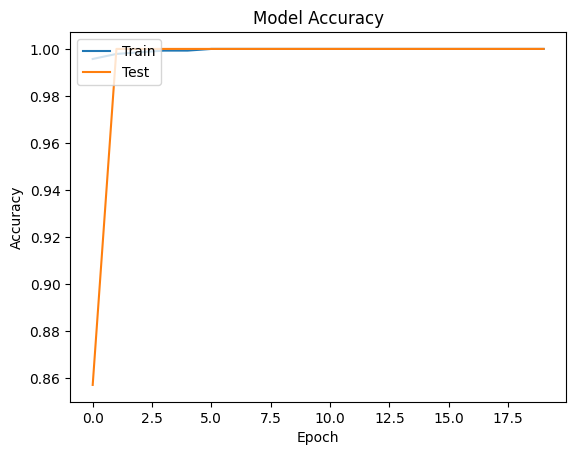

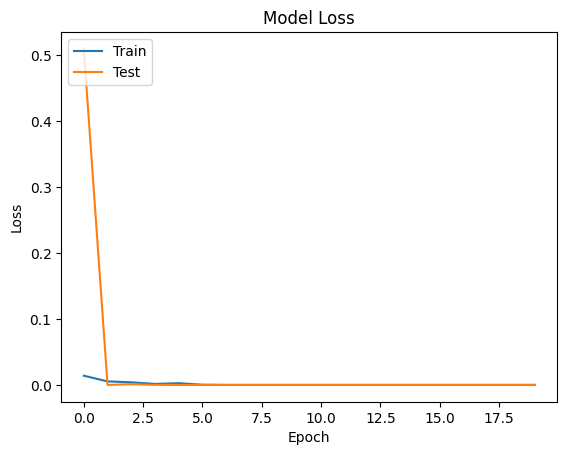

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot g & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:

# Đánh giá mô hình trên tập kiểm tra
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dataset,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


test_loss, test_acc = model.evaluate(test_generator)
print('Độ mất mát trên tập kiểm tra:', test_loss)
print('Độ chính xác trên tập kiểm tra:', test_acc)

Found 807 images belonging to 2 classes.
26/26 [==============================] - 44s 2s/step - loss: 3.7173 - accuracy: 0.7993
Độ mất mát trên tập kiểm tra: 3.717348098754883
Độ chính xác trên tập kiểm tra: 0.7992565035820007


In [ ]:
# Lưu mô hình
model.save('/content/drive/MyDrive/DA004/model_LC.h5')
model.save('/content/drive/MyDrive/DA004/model_LC.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
